In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Dense
from collections import Counter


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/drive/My Drive/TensorFlow2.0/BankLoanAPI/bankloan.csv')
df = df.dropna() # drop missing values
df = df.drop('Loan_ID', axis=1) # drop Loan_ID since it does not play any significant role

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
# 
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
# Counter creates a dictionary
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [6]:
y = df['Loan_Status'] # Labels
X = df.drop('Loan_Status', axis=1) # Features
print("y Shape: {}".format(y.shape))
print("X Shape: {}".format(X.shape))

y Shape: (480,)
X Shape: (480, 11)


In [0]:
# One hot encoding
dm_X = pd.get_dummies(X)
# Create a dict which treats Y as 1 and N as 0
dm_y = y.map(dict(Y=1, N=0))

In [8]:
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [9]:
dm_y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [0]:
# SMOTE analysis
smote = SMOTE(ratio='minority')
X1, y = smote.fit_sample(dm_X, dm_y)

In [0]:
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [12]:
Counter(y)

Counter({0: 332, 1: 332})

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [14]:
print("X_train shape {}".format(X_train.shape))
print("X_test shape {}".format(X_test.shape))
print("y_train shape {}".format(y_train.shape))
print("y_test shape {}".format(y_test.shape))

X_train shape (531, 17)
X_test shape (133, 17)
y_train shape (531,)
y_test shape (133,)


In [15]:
X_test.shape[1]

17

In [16]:
# Build the model
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3600      
_________________________________________________________________
dense_2 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1604      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 85,609
Trainable params: 85,609
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# Fit the model
classifier.fit(X_train, y_train, batch_size=20, epochs=100, verbose=0)

In [19]:
# Evaluate the model
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 104us/step


[0.2721787948729628, 0.860640300981518]

In [0]:
# Predict
y_pred = classifier.predict(X_test)
# Greater than 0.5 treat as approved
y_pred = (y_pred > 0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

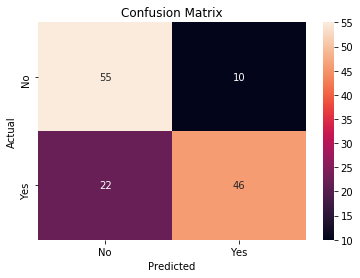

In [21]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, titles and ticks
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [0]:
import pickle
from sklearn.externals import joblib

In [0]:
joblib.dump(classifier, 'Loan_Model.pkl')

In [0]:
classifier.save("Loan_Model.h5")

In [0]:
# Recreate the exact same model purely from the file
from keras import models
mdl = models.load_model('Loan_Model.h5')

In [0]:
y_pred = mdl.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
val = pd.DataFrame(y_pred, columns=['Status'])
val = val.replace({True:'Approve', False:'Rejected'})
val